# Perform Inference with Trained Model

In [3]:
# imports
import boto3
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
import torch

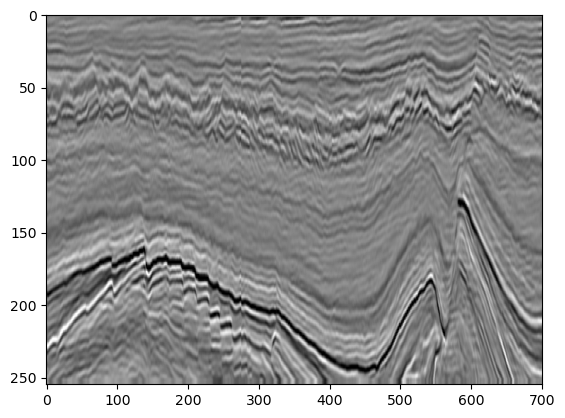

In [2]:
# Initialize a session using Amazon S3
s3 = boto3.client('s3')

# Define the bucket and object key
bucket_name = 'misc-bucket-new'
object_key = 'seismic_volumes/train_seismic.npy'

# Retrieve the object from S3
response = s3.get_object(Bucket=bucket_name, Key=object_key)
array_data = response['Body'].read()

# Load the NumPy array from the byte stream
seismic = np.load(BytesIO(array_data))

# display a section
plt.imshow(seismic[0].T, cmap='gray', aspect='auto')
plt.show()


In [4]:
# model utils

def load_checkpoint_from_s3(s3_bucket, s3_key):
    """
    Loads a training checkpoint from an S3 bucket.

    Args:
        model: The PyTorch model.
        optimizer: The optimizer used during training.
        s3_bucket: The name of the S3 bucket.
        s3_key: The key (path) within the S3 bucket where the checkpoint is stored.

    Returns:
        The epoch number loaded from the checkpoint.
    """
    s3 = boto3.client('s3')
    obj = s3.get_object(Bucket=s3_bucket, Key=s3_key)

    # Create a BytesIO buffer to store the downloaded checkpoint
    buffer = BytesIO(obj['Body'].read())

    # Load the checkpoint from the buffer
    checkpoint = torch.load(buffer)

    # Load model and optimizer states
    checkpoint = {
        'epoch': checkpoint['epoch'],
        'model_state_dict': checkpoint['model_state_dict'],
        'optimizer_state_dict': checkpoint['optimizer_state_dict']
    }

    return checkpoint

In [ ]:
# model definition

